# ANÁLISE DE ATRIBUTOS DE FURTO DE CARROS NO ANO DE 2017 NA ÁREA DE SÃO JOSÉ DOS CAMPOS (DEPARTAMENTO DENTEIR 1) 

## Por Sham Vinicius Fiorin

## PROGRAMA DE CIÊNCIAS DE DADOS
### ANÁLISE NA ÁREA DE SÃO JOSÉ DOS CAMPOS
#### DEPARTAMENTO DENTEIR 1 : SÃO JOSÉ DOS CAMPOS
#### SECCIONAL DEP. SEC. SÃO JOSÉ DOS CAMPOS.

#### Fonte dataset: http://www.ssp.sp.gov.br/transparenciassp/ : Furto de Veiculos

#### Link GitHub: https://github.com/skatesham/Inteligencia-Artificial-com-Raspagem-em-Python

### Analise informativa de roubos de veículos no ano de 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def analisarAno():
    '''
    Juntar todos dataset's dos meses em um DataFrame
    '''
    mes = 1
    ano = 2017
    dfs = list()
    for i in range(12):
        df = pd.read_csv("dataset.furto.carros/"+"DadosBO_"+str(ano)+"_"+str(mes)+"(FURTO", encoding='utf-16', sep="	",error_bad_lines=False)
        dfs.append(df)
        mes += 1
    df = pd.concat(dfs)
    return df

def autolabel(rects):
    '''
    Atribuir descrição a gráficos de barra
    '''
    x_pos = [rect.get_x() + rect.get_width()/2. for rect in rects]
    y_pos = [rect.get_y() + 1.05*rect.get_height() for rect in rects]
    #if height constant: hbars, vbars otherwise
    if (np.diff([plt.getp(item, 'width') for item in rects])==0).all():
        scores = [plt.getp(item, 'height') for item in rects]
    else:
        scores = [plt.getp(item, 'width') for item in rects]
    # attach some text labels
    for rect, x, y, s in zip(rects, x_pos, y_pos, scores):
        ax.text(x, 
                y,
                '%s'%s,
                ha='center', va='bottom')
        
        
# Iniciando DataFrame
df = analisarAno()
# Atribuindo coluna valor 1 para agrupamento de quantidade
df['valor'] = 1
# Criando Dataframe "cores" agrupado por cores de veiculos
cores = df.groupby('DESCR_COR_VEICULO').sum()
# Ordenando DataFrame das cores dos carros 
cores.sort_values(by='valor', ascending=0, inplace=True)
# Salvando variaveis para simplificação e reuso
total = df['DESCR_COR_VEICULO'].size
positivos = cores['valor'].sum()
nulos = df['DESCR_COR_VEICULO'].isna().sum()

# Análise de consistencia do dataset
print('Boletins de Ocorrencia região São José Ano de 2017')
print("\nValores Nulos em Cores de Veiculos:")
print('Positivos: ',positivos)
print('Nulos:     ',nulos)
print('Total: ',total,"==",positivos+nulos)
df = df.reset_index()
# Criando Coluna de Porcentagem das cores dos carros
cores['porcentagem'] = (((cores['valor']/positivos)*10000).round())/100
## Testando porcentagem total arrendondada
print('Total das porcentagem: %.1f' %cores['porcentagem'].sum())

Boletins de Ocorrencia região São José Ano de 2017

Valores Nulos em Cores de Veiculos:
Positivos:  3150
Nulos:      522
Total:  3672 == 3672
Total das porcentagem: 100.0


In [3]:
# Head do DataFrame com as colunas novas: 'valor' e 'porcentagem'
cores[['valor','porcentagem']].head(10)

,valor,porcentagem
DESCR_COR_VEICULO,,
Prata,706,22.41
Preta,570,18.10
Branco,481,15.27
Cinza,456,14.48
Vermelho,399,12.67
Azul,273,8.67
Verde,149,4.73
Bege,47,1.49
Amarelo,23,0.73


## Gráfico de Furto de Carro por cores no ano de 2017

Text(0,0.5,'Porcentagem de Furtos')

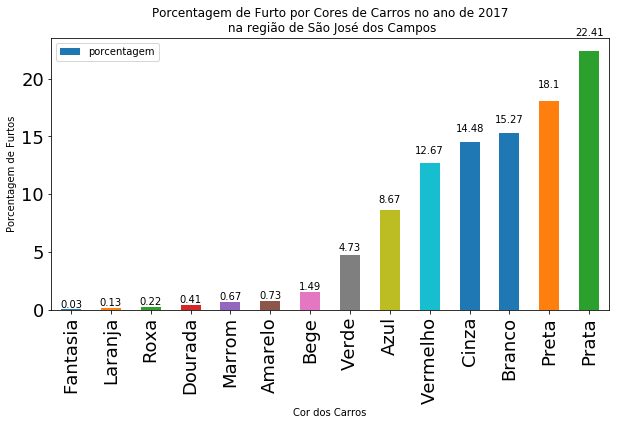

In [4]:
# Plot do Gráfico de Furto por cores do ano de 2017
ax = cores['porcentagem'].sort_values().plot(kind='bar',
                                             fontsize=18,
                                             legend=True,
                                             figsize=(10,5),
                                             title="Porcentagem de Furto por Cores de Carros no ano de 2017\n na região de São José dos Campos"
                                            )

#
ax.set_alpha(0.8)
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Cor dos Carros")
# Configurando nome para lacuna de Y
ax.set_ylabel("Porcentagem de Furtos")

## Gráfico de % Erro por valores nulos na coluna de CORES

Text(0,0.5,'Porcentagem')

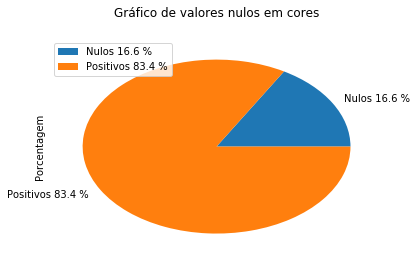

In [5]:
#String mode para reposta dos erros
    #print("Margem de Erro por Nulos:",(((nulos/positivos)*1000).round())/10,"%")
    
# Porcentagem de Valores Nulos de cores no DataFrame
erroNulo = ((((nulos/positivos)*1000).round())/10)
# Porcentagem de Valores positivos de cores no DataFrame
erroPositivo = 100-erroNulo
# Criação de Série para criação de gráfico
serie = pd.Series({"Nulos "+str(erroNulo)+" %":erroNulo, "Positivos "+str(erroPositivo)+" %":erroPositivo})
# Criando Gráfico de valores nulos
ax = serie.plot(kind='pie',
                title="Gráfico de valores nulos em cores\n",
                legend=True
               )

# Configurando nome para lacuna de Y
ax.set_ylabel("Porcentagem")
# Configurando nome para lacuna de X
    #ax.set_xlabel("Valores Totais Nulos")

## Gráfico de Ocorrencia por Períodos do ano de 2017

Nulos por Periodo da Ocorrencia: 0


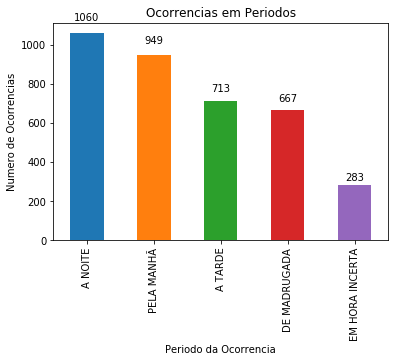

In [6]:
# Plot Gráfico de Furto por horários
ax = df.groupby('PERIDOOCORRENCIA').sum().sort_values(by='valor', ascending=0)['valor'].plot('bar',title="Ocorrencias em Periodos")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Periodo da Ocorrencia")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")
print("Nulos por Periodo da Ocorrencia:",df['PERIDOOCORRENCIA'].isna().sum())

## Gráfico de Ocorrencia por Dia do Mês no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

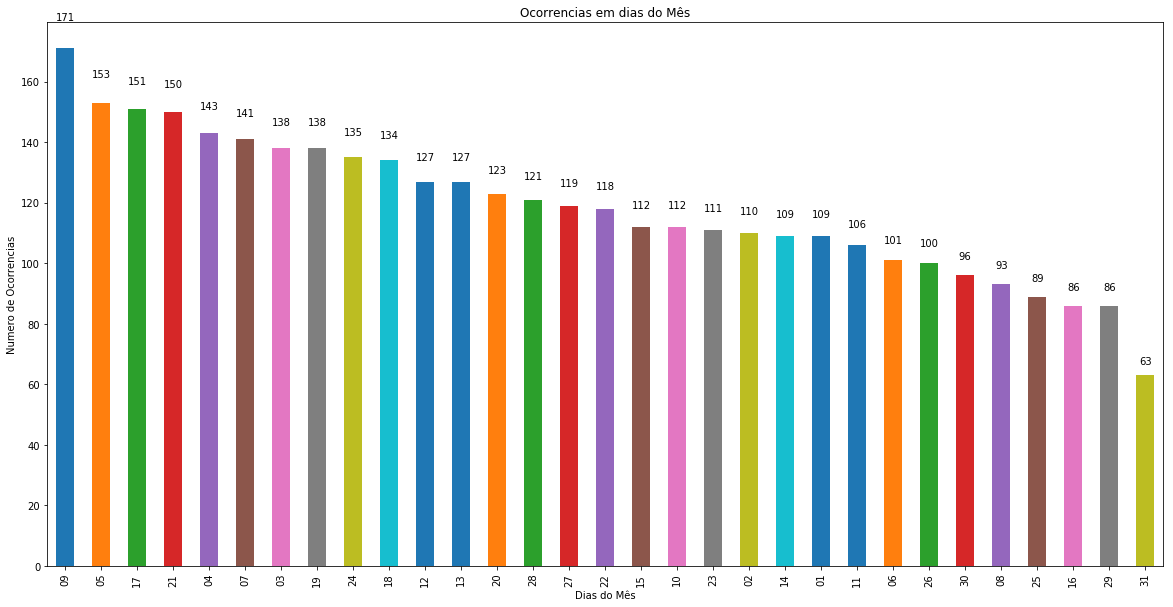

In [7]:
df['dia'] = (df['DATAOCORRENCIA']).str.slice(0,2)
ax = df.groupby('dia').sum().sort_values(by='valor', ascending=0)['valor'].plot('bar',figsize=(20,10), title="Ocorrencias em dias do Mês")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Dias do Mês")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

## Gráfico de ocorrencia de furto por ano do modelo do carro no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

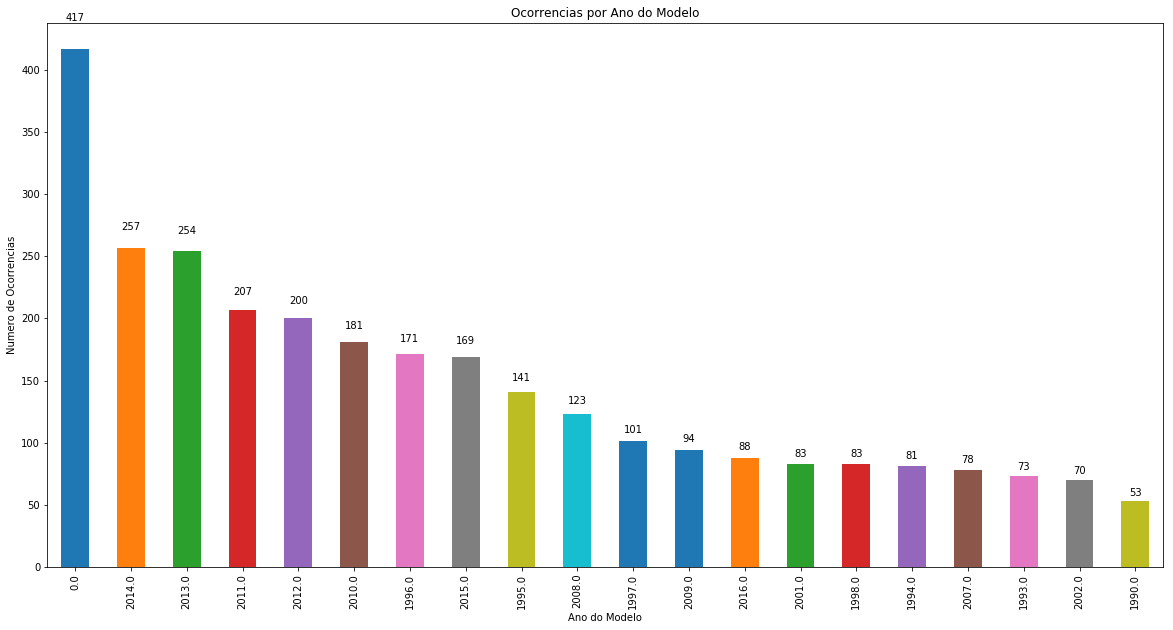

In [8]:
ax = df.groupby('ANO_MODELO').sum().sort_values(by='valor', ascending=0)['valor'].head(20).plot('bar',figsize=(20,10), title="Ocorrencias por Ano do Modelo")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Ano do Modelo")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

## Gráfico de ocorrencia de furto por ano do fabricação do carro no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

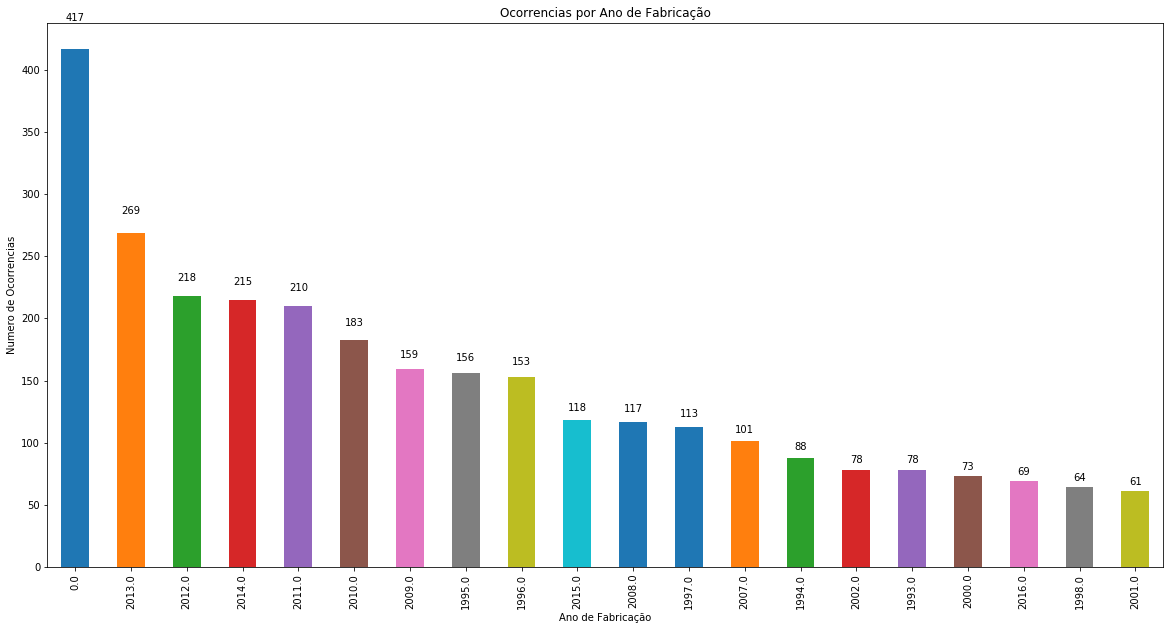

In [9]:
ax = df.groupby('ANO_FABRICACAO').sum().sort_values(by='valor', ascending=0)['valor'].head(20).plot('bar',figsize=(20,10), title="Ocorrencias por Ano de Fabricação")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Ano de Fabricação")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

#### % de nulos por ano de fabricação

In [10]:
print(((((df.ANO_FABRICACAO.isna().sum()+417)/(total-417))*1000).round())/10, "% de Erro por Ano de Fabricação")

16.4 % de Erro por Ano de Fabricação


## Gráfico de Ocorrencia de furtos por marca e modelo de veiculo no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

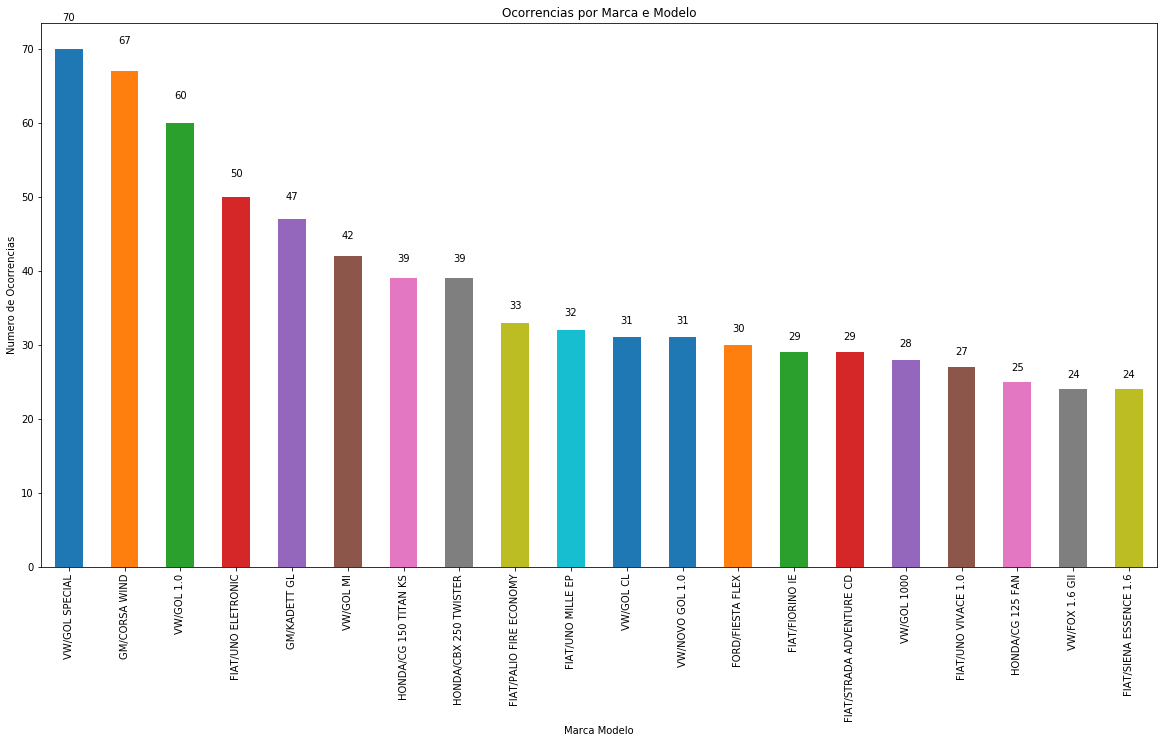

In [11]:
ax = df.groupby('DESCR_MARCA_VEICULO').sum().sort_values(by='valor', ascending=0)['valor'].head(20).plot('bar',figsize=(20,10), title="Ocorrencias por Marca e Modelo")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Marca Modelo")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

## Gráfico de Ocorrencias de furto por Marca dos Veiculos no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

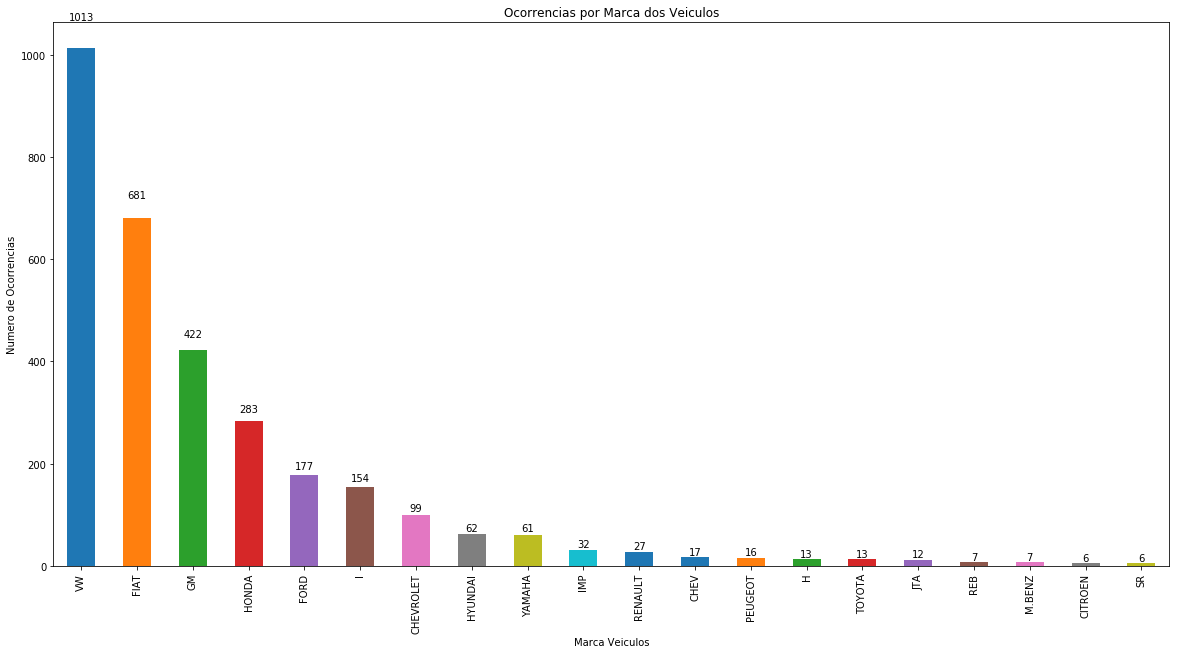

In [12]:
## Criando Coluna com Somente nome da marca
df['marca'] = df.DESCR_MARCA_VEICULO.str.split('/', expand=True)[0]
ax = df.groupby('marca').sum().sort_values(by='valor', ascending=0)['valor'].head(20).plot('bar',figsize=(20,10), title="Ocorrencias por Marca dos Veiculos")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Marca Veiculos")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

## Gráfico de Ocorrencias de furtos por modelos da marca VW no ano de 2017

Text(0,0.5,'Numero de Ocorrencias')

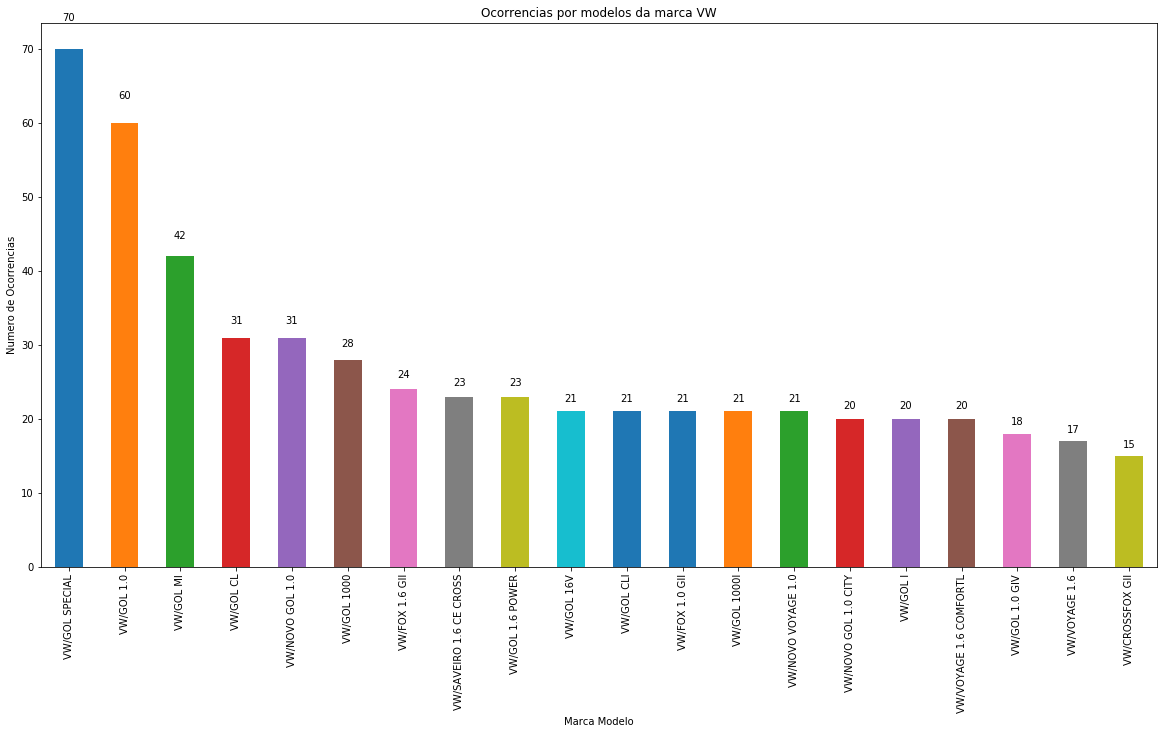

In [13]:
ax = df[df.marca == 'VW'].groupby('DESCR_MARCA_VEICULO').sum().sort_values(by='valor', ascending=0)['valor'].head(20).plot('bar',figsize=(20,10), title="Ocorrencias por modelos da marca VW")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("Marca Modelo")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

In [14]:
print(((df.isna().sum().DESCR_MARCA_VEICULO / positivos)*1000).round()/10, "% de Nulos em Descrição de veiculos")

17.0 % de Nulos em Descrição de veiculos


## Gráfico de Ocorrencia de furto de Veículos da Marca VW dos Modelos GOL

Text(0,0.5,'Numero de Ocorrencias')

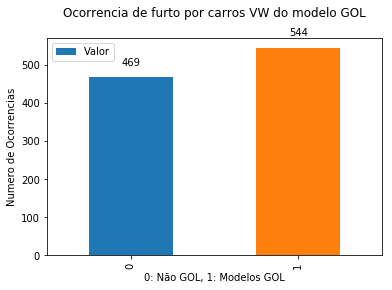

In [15]:
#separando Marca VM os nomes
gol = df[df.marca == 'VW']['DESCR_MARCA_VEICULO'].reset_index()
# Criando Coluna com valores de modelo GOL
gol['GOL'] = gol['DESCR_MARCA_VEICULO'].str.find("GOL")
#criando variaveis com valores de quantidade gol's por VW
carros_gol = gol[gol.GOL != -1].count()
carros_nao_gol = gol[gol.GOL == -1].count()
#Resolução do gráfico
d = {'Explicacao': ["Carro Não GOL",'Carros GOL'], "Valor":[carros_nao_gol.GOL,carros_gol.GOL]}
d = pd.DataFrame(data=d)
#Plotando Gráfico
ax = d.Valor.plot('bar',legend=True, title="Ocorrencia de furto por carros VW do modelo GOL\n")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("0: Não GOL, 1: Modelos GOL")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

In [28]:
print("Veículos GOL furtados: ",((carros_gol.GOL/positivos)*1000).round()/10,"%")
print("Veiculos GOL furtados em VW: ",(int((carros_gol.GOL/(carros_gol.GOL+carros_nao_gol.GOL))*1000)/10),"%")

Veículos GOL furtados:  17.3 %
Veiculos GOL furtados em VW:  53.7 %


Text(0,0.5,'Numero de Ocorrencias')

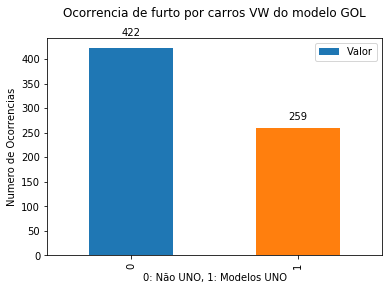

In [29]:
#separando Marca VM os nomes
uno = df[df.marca == 'FIAT']['DESCR_MARCA_VEICULO'].reset_index()
# Criando Coluna com valores de modelo GOL
uno['UNO'] = uno['DESCR_MARCA_VEICULO'].str.find("UNO")
#criando variaveis com valores de quantidade gol's por VW
carros_uno = uno[uno.UNO != -1].count()
carros_nao_uno = uno[uno.UNO == -1].count()
#Resolução do gráfico
d = {'Explicacao': ["Carro Não UNO",'Carros UNO'], "Valor":[carros_nao_uno.UNO, carros_uno.UNO]}
d = pd.DataFrame(data=d)
#Plotando Gráfico
ax = d.Valor.plot('bar',legend=True, title="Ocorrencia de furto por carros VW do modelo GOL\n")
# Inserindo valores no gráfico
autolabel(ax.patches)
# Configurando nome para lacuna de X
ax.set_xlabel("0: Não UNO, 1: Modelos UNO")
# Configurando nome para lacuna de Y
ax.set_ylabel("Numero de Ocorrencias")

In [31]:
print("Veículos UNO furtados: ",((carros_uno.UNO/positivos)*1000).round()/10,"%")
print("Veiculos UNO furtados em FIAT: ",(int((carros_uno.UNO/(carros_uno.UNO+carros_nao_uno.UNO))*1000)/10),"%")

Veículos UNO furtados:  8.2 %
Veiculos UNO furtados em FIAT:  38.0 %
